In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
weather = pd.read_csv("data/historical_weather.csv", ",", parse_dates= ["time"])
weather["precipitation_sum (mm)"] = weather["precipitation_sum (mm)"].replace(np.nan, 0)
weather.rename(columns={
  "temperature_2m_max (°C)": "max_temp",
  "temperature_2m_min (°C)": "min_temp",
  "temperature_2m_mean (°C)": "mean_temp",
  "precipitation_sum (mm)": "precipitation"
}, inplace=True)
weather

C:\Users\MICHELE\AppData\Local\Temp\ipykernel_1364\2028645182.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  weather = pd.read_csv("data/historical_weather.csv", ",", parse_dates= ["time"])


,time,max_temp,min_temp,mean_temp,precipitation
0,1940-01-01,2.1,-5.5,-2.1,0.0
1,1940-01-02,1.1,-4.8,-2.3,0.0
2,1940-01-03,-1.4,-6.5,-4.5,0.0
3,1940-01-04,3.1,-2.4,0.3,1.6
4,1940-01-05,5.6,-0.8,2.4,0.1
...,...,...,...,...,...
30311,2022-12-27,11.8,1.3,6.0,0.0
30312,2022-12-28,8.9,2.0,5.9,0.4
30313,2022-12-29,9.1,4.2,7.0,1.1
30314,2022-12-30,9.2,6.0,7.8,0.3


In [9]:
years = np.arange(int(weather["time"].dt.strftime('%Y').min()), int(weather["time"].dt.strftime('%Y').max())+1) #lista degli anni del campionamento
def toSeasonString(month) :
    if month==3 or month==4 or month==5 :
        return "Primavera"
    if month==6 or month==7 or month==8 :
        return "Estate"
    if month==9 or month==10 or month==11 :
        return "Autunno"
    if month==12 or month==1 or month==2 :
        return "Inverno"
    return "Nessuno"
seasons = []
for row in weather.itertuples(index=True, name='Pandas'):
    seasons.append(toSeasonString(int(row[1].strftime('%m'))))
weather["season"] = seasons
seasons = ["Primavera", "Estate", "Autunno", "Inverno"]
weather

,time,max_temp,min_temp,mean_temp,precipitation,season
0,1940-01-01,2.1,-5.5,-2.1,0.0,Inverno
1,1940-01-02,1.1,-4.8,-2.3,0.0,Inverno
2,1940-01-03,-1.4,-6.5,-4.5,0.0,Inverno
3,1940-01-04,3.1,-2.4,0.3,1.6,Inverno
4,1940-01-05,5.6,-0.8,2.4,0.1,Inverno
...,...,...,...,...,...,...
30311,2022-12-27,11.8,1.3,6.0,0.0,Inverno
30312,2022-12-28,8.9,2.0,5.9,0.4,Inverno
30313,2022-12-29,9.1,4.2,7.0,1.1,Inverno
30314,2022-12-30,9.2,6.0,7.8,0.3,Inverno


## Temperature medie delle temperature massime per mese

In [40]:
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]
means = []
for month in months : 
    mean = weather[(weather["time"].dt.strftime('%m'))==month]["max_temp"].mean()
    means.append(mean)
analysis_maxtemp = pd.DataFrame({"months" : months, "mean" : means})
analysis_maxtemp

,months,mean
0,01,5.528527
1,02,7.719275
2,03,12.095492
3,04,15.944578
4,05,20.086358
5,06,24.014819
6,07,26.556316
7,08,26.011387
8,09,22.050522
9,10,16.528760


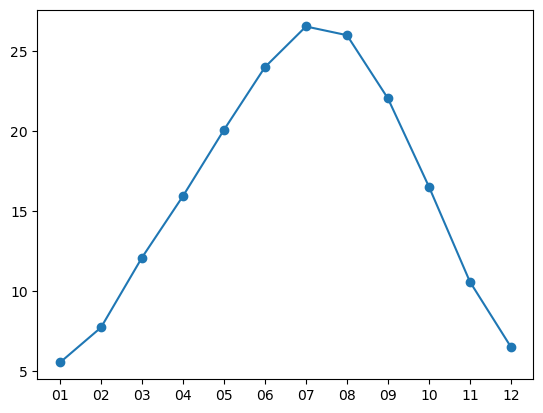

<Figure size 3000x3000 with 0 Axes>

In [41]:
plt.plot(analysis_maxtemp.months, analysis_maxtemp["mean"], marker='o')
plt.figure(figsize=(30,30))
plt.show()

## Temperature medie delle temperature massime per anno

In [42]:
years = np.arange(int(weather["time"].dt.strftime('%Y').min()), int(weather["time"].dt.strftime('%Y').max())+1)
means = []
for year in years : 
    mean = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["max_temp"].mean()
    means.append(mean)
analysis_maxtemp = pd.DataFrame({"years" : years, "mean" : means})
analysis_maxtemp

,years,mean
0,1940,15.285792
1,1941,15.349589
2,1942,16.400000
3,1943,17.396986
4,1944,16.358743
...,...,...
78,2018,17.554521
79,2019,17.761370
80,2020,17.436339
81,2021,16.938356


## Relazione tra l'anno e la temperatura media massima?

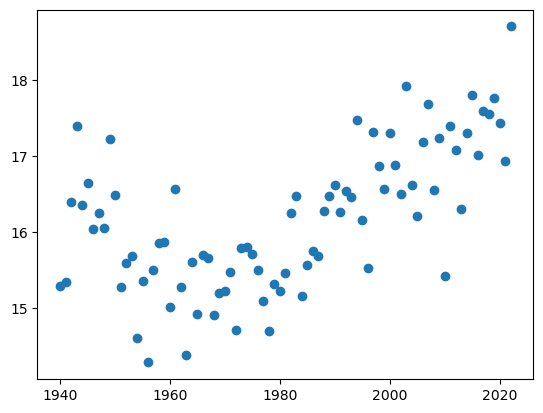

0.594924232285418


In [45]:
plt.scatter(analysis_maxtemp.years, analysis_maxtemp["mean"])
plt.show()
print(analysis_maxtemp.years.corr(analysis_maxtemp["mean"]))

## La stessa relazione c è anche per le temperature medie giornaliere?

In [46]:
means = []
for year in years : 
    mean = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["mean_temp"].mean()
    means.append(mean)
analysis_meantemp = pd.DataFrame({"years" : years, "mean" : means})
analysis_meantemp

,years,mean
0,1940,10.613661
1,1941,10.671781
2,1942,11.654247
3,1943,12.498356
4,1944,11.614754
...,...,...
78,2018,13.134521
79,2019,13.019452
80,2020,12.754918
81,2021,12.108493


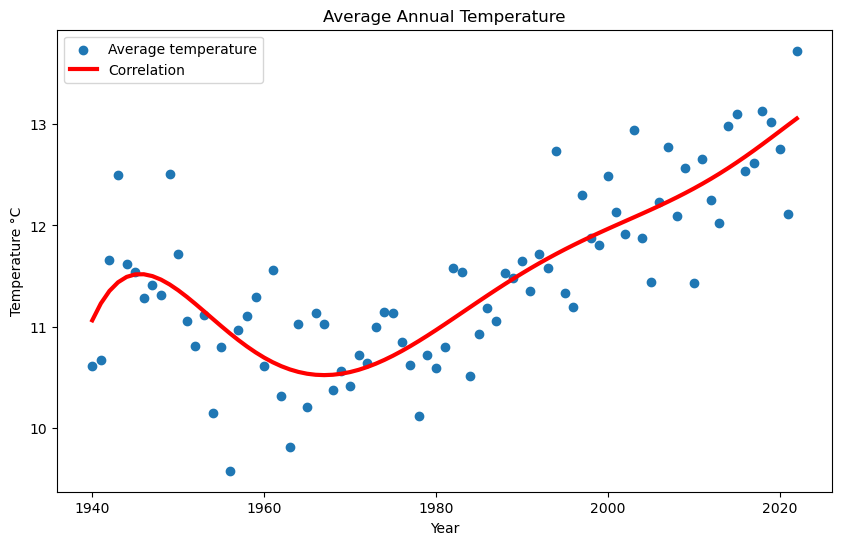

0.6421457316743536

In [47]:
plt.figure(figsize=(10, 6))

plt.scatter(analysis_meantemp.years, analysis_meantemp["mean"], label="Average temperature")

z = np.polyfit(analysis_meantemp.years, analysis_meantemp["mean"], 6)
p = np.poly1d(z)
plt.plot(analysis_meantemp.years, p(analysis_meantemp.years), color="red", linewidth=3.0, label="Correlation")

plt.title("Average Annual Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.legend(loc="upper left")

plt.show()
analysis_meantemp.years.corr(analysis_meantemp["mean"])

## Temperature massime per anno 

In [48]:
maxs = []
for year in years : 
    max = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["max_temp"].max()
    maxs.append(max)
analysis_maxtemp = pd.DataFrame({"years" : years, "max" : maxs})
analysis_maxtemp

,years,max
0,1940,32.3
1,1941,31.3
2,1942,32.2
3,1943,35.1
4,1944,34.4
...,...,...
78,2018,33.0
79,2019,36.1
80,2020,34.1
81,2021,32.1


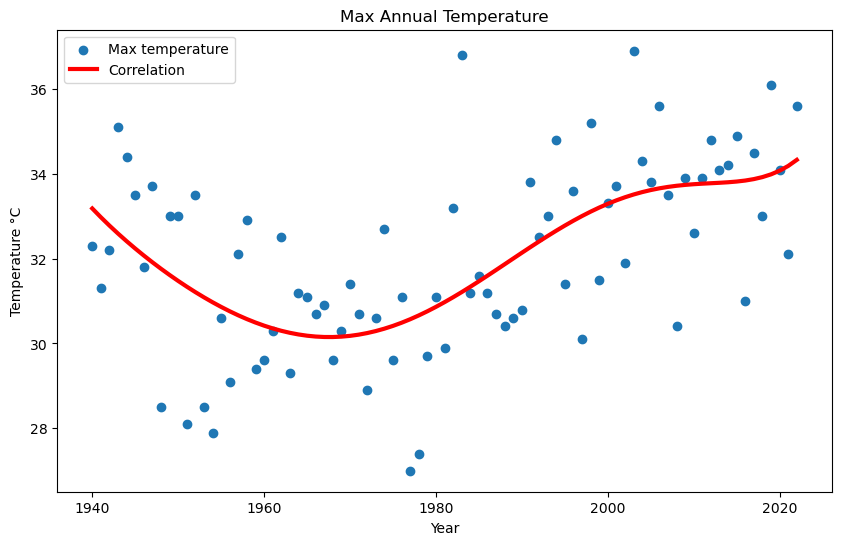

0.42824656717814386

In [49]:
plt.figure(figsize=(10, 6))

plt.scatter(analysis_maxtemp.years, analysis_maxtemp["max"], label="Max temperature")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp["max"], 6)
p = np.poly1d(z)
plt.plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="red", linewidth=3.0, label="Correlation")

plt.title("Max Annual Temperature")
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.legend(loc="upper left")

plt.show()
analysis_maxtemp.years.corr(analysis_maxtemp["max"])

## Temperature massime stagionali per anno

In [50]:
primavera_maxes = []
estate_maxes = []
autunno_maxes = []
inverno_maxes = []
for year in years : 
    primavera_max = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Primavera")]["max_temp"].max()
    primavera_maxes.append(primavera_max)
    estate_max = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Estate")]["max_temp"].max()
    estate_maxes.append(estate_max)
    autunno_max = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Autunno")]["max_temp"].max()
    autunno_maxes.append(autunno_max)
    inverno_max = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Inverno")]["max_temp"].max()
    inverno_maxes.append(inverno_max)

analysis_maxtemp = pd.DataFrame({"years" : years, "primavera" : primavera_maxes, "estate" : estate_maxes, "autunno" : autunno_maxes, "inverno" : inverno_maxes})
analysis_maxtemp

,years,primavera,estate,autunno,inverno
0,1940,26.6,32.3,29.6,11.8
1,1941,22.8,31.3,28.6,12.0
2,1942,27.0,32.2,32.0,12.5
3,1943,27.4,35.1,32.1,16.7
4,1944,26.1,34.4,30.9,15.5
...,...,...,...,...,...
78,2018,26.5,33.0,27.5,14.2
79,2019,22.0,36.1,29.0,17.9
80,2020,24.7,34.1,27.7,16.8
81,2021,23.7,32.1,28.0,18.4


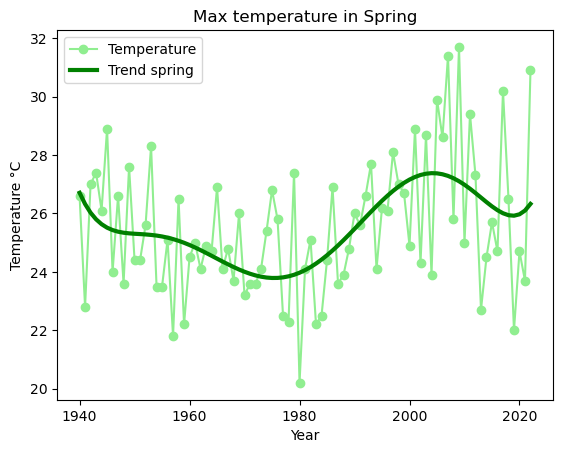

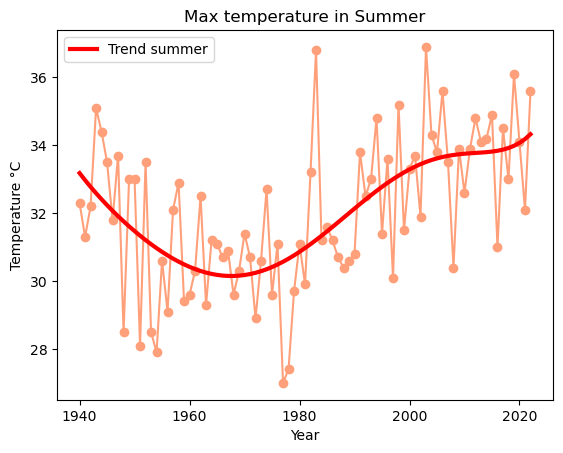

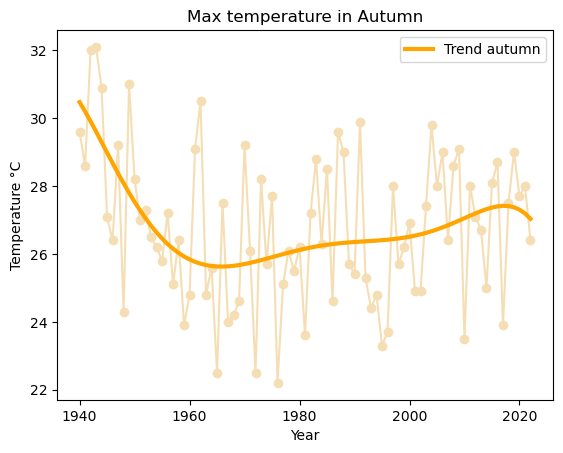

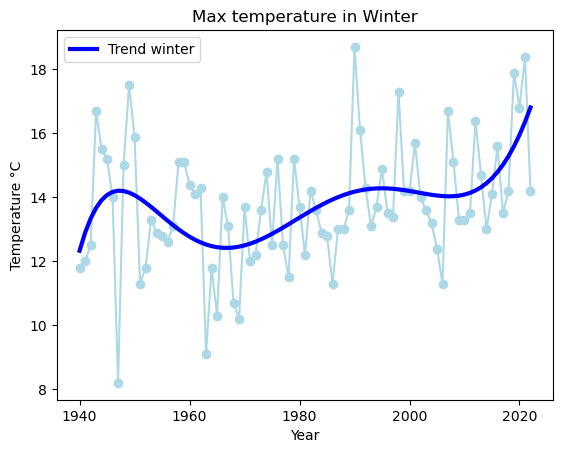

In [51]:
# Spring
plt.plot(analysis_maxtemp.years, analysis_maxtemp.primavera, marker='o', color="lightgreen", label="Temperature")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.primavera, 6)
p = np.poly1d(z)
plt.plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="green", linewidth=3.0, label="Trend spring")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.title("Max temperature in Spring")

plt.show()

# Summer
plt.plot(analysis_maxtemp.years, analysis_maxtemp.estate, marker='o', color="lightsalmon")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.estate, 6)
p = np.poly1d(z)
plt.plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="red", linewidth=3.0, label="Trend summer")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.title("Max temperature in Summer")

plt.show()

# Autumn
plt.plot(analysis_maxtemp.years, analysis_maxtemp.autunno, marker='o', color="wheat")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.autunno, 6)
p = np.poly1d(z)
plt.plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="orange", linewidth=3.0, label="Trend autumn")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.title("Max temperature in Autumn")

plt.show()

# Winter
plt.plot(analysis_maxtemp.years, analysis_maxtemp.inverno, marker='o', color="lightblue")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.inverno, 6)
p = np.poly1d(z)
plt.plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="blue", linewidth=3.0, label="Trend winter")

plt.legend()
plt.xlabel("Year")
plt.ylabel("Temperature °C")
plt.title("Max temperature in Winter")

plt.show()

plt.scatter(analysis_maxtemp.years, analysis_maxtemp.primavera, color="lightgreen", label="Max spring")
plt.scatter(analysis_maxtemp.years, analysis_maxtemp.estate, color="lightsalmon", label="Max summer")
plt.scatter(analysis_maxtemp.years, analysis_maxtemp.autunno, color="wheat", label="Max autumn")
plt.scatter(analysis_maxtemp.years, analysis_maxtemp.inverno, color="lightblue", label="Max winter")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.primavera, 6)
p = np.poly1d(z)
plt.plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="green", linewidth=3.0, label="Trend spring")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.estate, 6)
p = np.poly1d(z)
plt.plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="red", linewidth=3.0, label="Trend spring")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.autunno, 6)
p = np.poly1d(z)
plt.plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="orange", linewidth=3.0, label="Trend spring")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.inverno, 6)
p = np.poly1d(z)
plt.plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="blue", linewidth=3.0, label="Trend spring")
plt.xlabel('Year')
plt.ylabel('Max Temperature °C')
#plt.title('Annual Seasonal Max')
plt.legend()

plt.show()

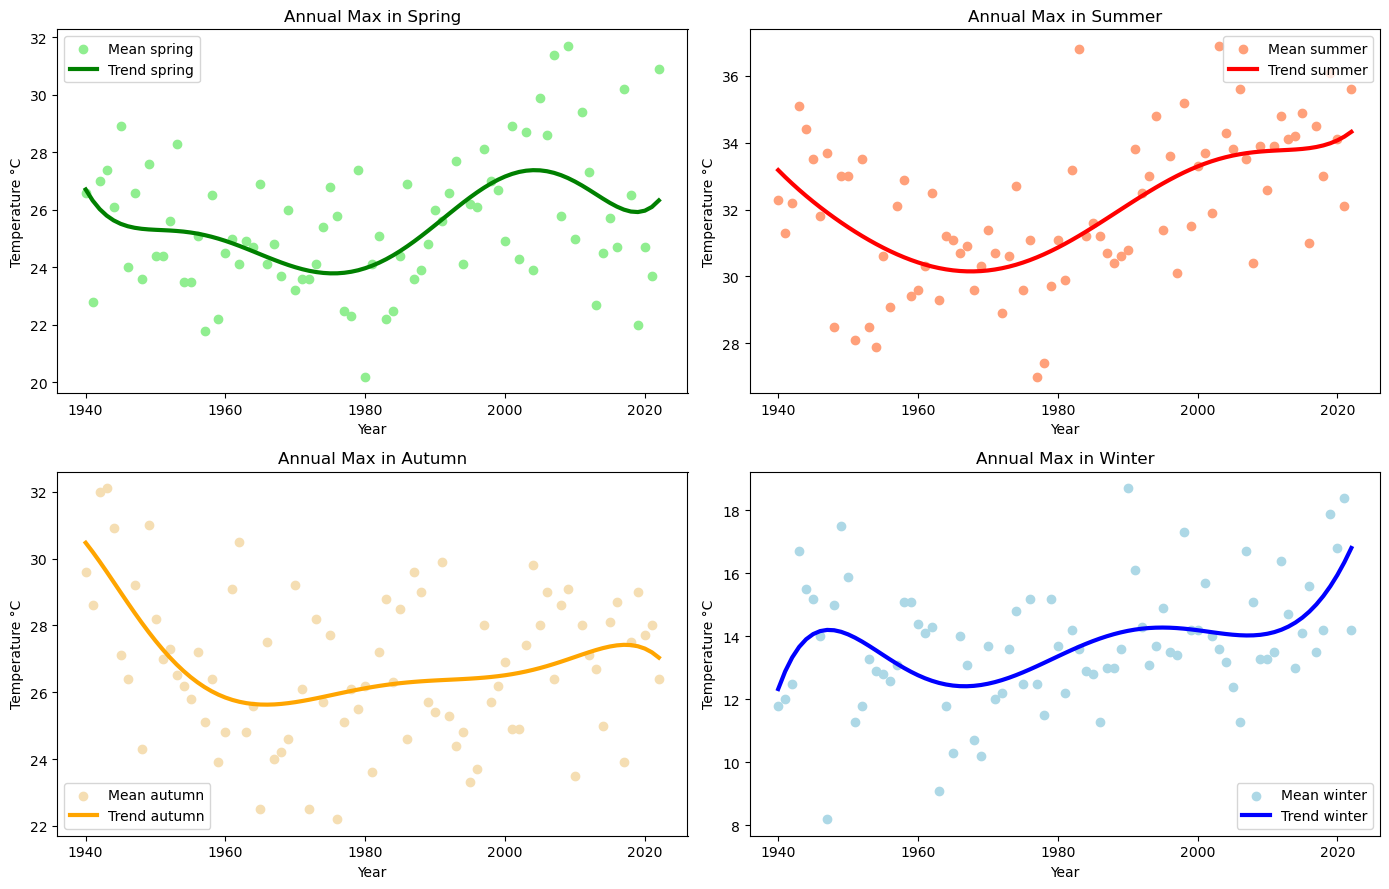

In [52]:
fig, ax = plt.subplots(2, 2)

fig.set_size_inches(14,9)

# Spring
ax[0,0].scatter(analysis_maxtemp.years, analysis_maxtemp.primavera, color="lightgreen", label="Mean spring")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.primavera, 6)
p = np.poly1d(z)
ax[0,0].plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="green", linewidth=3.0, label="Trend spring")

ax[0,0].set_title('Annual Max in Spring')
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Temperature °C")
ax[0,0].legend(loc="upper left")

# Summer
ax[0,1].scatter(analysis_maxtemp.years, analysis_maxtemp.estate, color="lightsalmon", label="Mean summer")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.estate, 6)
p = np.poly1d(z)
ax[0,1].plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="red", linewidth=3.0, label="Trend summer")

ax[0,1].set_title('Annual Max in Summer')
ax[0,1].set_xlabel("Year")
ax[0,1].set_ylabel("Temperature °C")
ax[0,1].legend(loc="upper right")

# Autumn
ax[1, 0].scatter(analysis_maxtemp.years, analysis_maxtemp.autunno, color="wheat", label="Mean autumn")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.autunno, 6)
p = np.poly1d(z)
ax[1, 0].plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="orange", linewidth=3.0, label="Trend autumn")


ax[1,0].set_title('Annual Max in Autumn')
ax[1,0].set_xlabel("Year")
ax[1,0].set_ylabel("Temperature °C")
ax[1,0].legend(loc="lower left")


# Winter
ax[1,1].scatter(analysis_maxtemp.years, analysis_maxtemp.inverno, color="lightblue", label="Mean winter")

z = np.polyfit(analysis_maxtemp.years, analysis_maxtemp.inverno, 6)
p = np.poly1d(z)
ax[1,1].plot(analysis_maxtemp.years, p(analysis_maxtemp.years), color="blue", linewidth=3.0, label="Trend winter")

ax[1,1].set_title('Annual Max in Winter')
ax[1,1].set_xlabel("Year")
ax[1,1].set_ylabel("Temperature °C")
ax[1,1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [53]:
print("Correlazione anno-temperatura massima in primavera: ", analysis_maxtemp.years.corr(analysis_maxtemp.primavera))
print("Correlazione anno-temperatura massima in estate: ", analysis_maxtemp.years.corr(analysis_maxtemp.estate))
print("Correlazione anno-temperatura massima in autunno: ", analysis_maxtemp.years.corr(analysis_maxtemp.autunno))
print("Correlazione anno-temperatura massima in inverno: ", analysis_maxtemp.years.corr(analysis_maxtemp.inverno))

Correlazione anno-temperatura massima in primavera:  0.2440115451502877
Correlazione anno-temperatura massima in estate:  0.42824656717814386
Correlazione anno-temperatura massima in autunno:  -0.10755920932491495
Correlazione anno-temperatura massima in inverno:  0.29831725959662186


## Temperature medie stagionali per anno

In [55]:
primavera_means = []
estate_means = []
autunno_means = []
inverno_means = []
means_label = []
for year in years : 
    primavera_mean = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Primavera")]["mean_temp"].mean()
    primavera_means.append(primavera_mean)
    estate_mean = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Estate")]["mean_temp"].mean()
    estate_means.append(estate_mean)
    autunno_mean = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Autunno")]["mean_temp"].mean()
    autunno_means.append(autunno_mean)
    inverno_mean = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Inverno")]["mean_temp"].mean()
    inverno_means.append(inverno_mean)

    means_label.append(str(year))
analysis_meantemp = pd.DataFrame({"years" : years, "primavera" : primavera_means, "estate" : estate_means, "autunno" : autunno_means, "inverno" : inverno_means})
analysis_meantemp

,years,primavera,estate,autunno,inverno
0,1940,11.502174,20.156522,11.993407,-1.312088
1,1941,10.138043,20.950000,11.320879,0.054444
2,1942,11.689130,20.731522,13.904396,0.064444
3,1943,12.590217,21.495652,12.696703,3.006667
4,1944,11.414130,21.393478,11.695604,1.850549
...,...,...,...,...,...
78,2018,12.301087,22.668478,14.410989,2.950000
79,2019,11.319565,23.254348,13.731868,3.574444
80,2020,12.492391,21.858696,12.718681,3.852747
81,2021,10.646739,22.089130,12.729670,2.772222


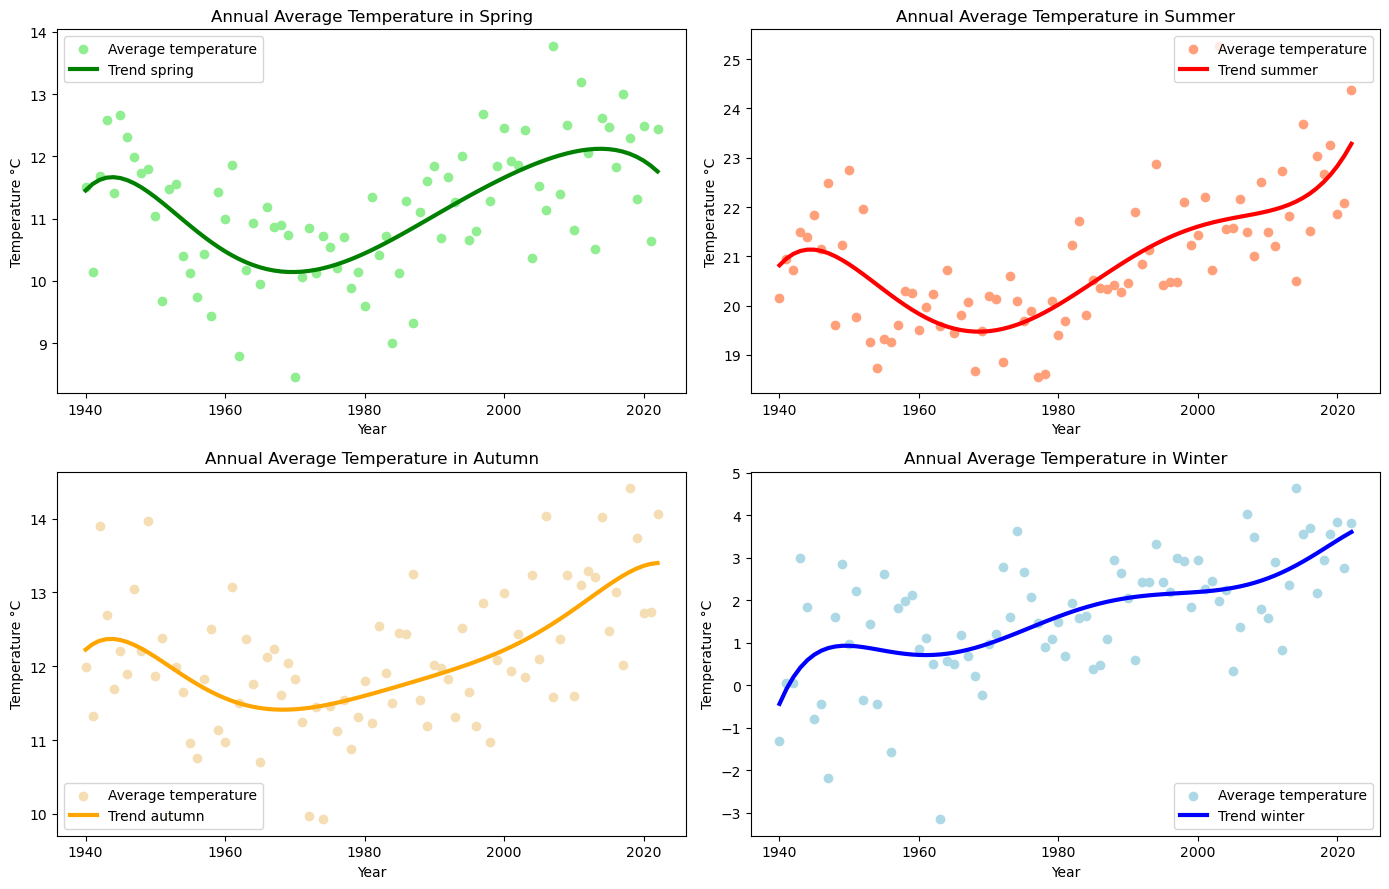

In [56]:
fig, ax = plt.subplots(2, 2)

fig.set_size_inches(14,9)

# Spring
ax[0,0].scatter(analysis_meantemp.years, analysis_meantemp.primavera, color="lightgreen", label="Average temperature")

z = np.polyfit(analysis_meantemp.years, analysis_meantemp.primavera, 6)
p = np.poly1d(z)
ax[0,0].plot(analysis_meantemp.years, p(analysis_meantemp.years), color="green", linewidth=3.0, label="Trend spring")

ax[0,0].set_title('Annual Average Temperature in Spring')
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Temperature °C")
ax[0,0].legend(loc="upper left")

# Summer
ax[0,1].scatter(analysis_meantemp.years, analysis_meantemp.estate, color="lightsalmon", label="Average temperature")

z = np.polyfit(analysis_meantemp.years, analysis_meantemp.estate, 6)
p = np.poly1d(z)
ax[0,1].plot(analysis_meantemp.years, p(analysis_meantemp.years), color="red", linewidth=3.0, label="Trend summer")

ax[0,1].set_title('Annual Average Temperature in Summer')
ax[0,1].set_xlabel("Year")
ax[0,1].set_ylabel("Temperature °C")
ax[0,1].legend(loc="upper right")

# Autumn
ax[1, 0].scatter(analysis_meantemp.years, analysis_meantemp.autunno, color="wheat", label="Average temperature")

z = np.polyfit(analysis_meantemp.years, analysis_meantemp.autunno, 6)
p = np.poly1d(z)
ax[1, 0].plot(analysis_meantemp.years, p(analysis_meantemp.years), color="orange", linewidth=3.0, label="Trend autumn")


ax[1,0].set_title('Annual Average Temperature in Autumn')
ax[1,0].set_xlabel("Year")
ax[1,0].set_ylabel("Temperature °C")
ax[1,0].legend(loc="lower left")

# Winter
ax[1,1].scatter(analysis_meantemp.years, analysis_meantemp.inverno, color="lightblue", label="Average temperature")

z = np.polyfit(analysis_meantemp.years, analysis_meantemp.inverno, 6)
p = np.poly1d(z)
ax[1,1].plot(analysis_meantemp.years, p(analysis_meantemp.years), color="blue", linewidth=3.0, label="Trend winter")

ax[1,1].set_title('Annual Average Temperature in Winter')
ax[1,1].set_xlabel("Year")
ax[1,1].set_ylabel("Temperature °C")
ax[1,1].legend(loc="lower right")

plt.tight_layout()
plt.show()

In [57]:
print("Correlazione anno-temperatura massima in primavera: ", analysis_meantemp.years.corr(analysis_meantemp.primavera))
print("Correlazione anno-temperatura massima in estate: ", analysis_meantemp.years.corr(analysis_meantemp.estate))
print("Correlazione anno-temperatura massima in autunno: ", analysis_meantemp.years.corr(analysis_meantemp.autunno))
print("Correlazione anno-temperatura massima in inverno: ", analysis_meantemp.years.corr(analysis_meantemp.inverno))

Correlazione anno-temperatura massima in primavera:  0.3306026151632022
Correlazione anno-temperatura massima in estate:  0.5078471162480419
Correlazione anno-temperatura massima in autunno:  0.36269573993256865
Correlazione anno-temperatura massima in inverno:  0.593456375465852


## Precipitazioni

### Media per mese

In [58]:
means = []
for month in months : 
    mean = weather[(weather["time"].dt.strftime('%m'))==month]["precipitation"].mean()
    means.append(mean)
analysis_precipitation = pd.DataFrame({"months" : months, "mean" : means})
analysis_precipitation

,months,mean
0,01,1.961018
1,02,2.084904
2,03,2.388418
3,04,3.286546
4,05,3.486553
5,06,3.200602
6,07,2.618772
7,08,3.038515
8,09,3.123253
9,10,3.409405


### Media per anno

In [60]:
means = []
for year in years : 
    mean = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["precipitation"].mean()
    means.append(mean)
analysis_precipitation = pd.DataFrame({"years" : years, "mean" : means})
analysis_precipitation

,years,mean
0,1940,1.850273
1,1941,2.801918
2,1942,2.123836
3,1943,2.126027
4,1944,2.210109
...,...,...
78,2018,3.069041
79,2019,3.198356
80,2020,2.953552
81,2021,2.751233


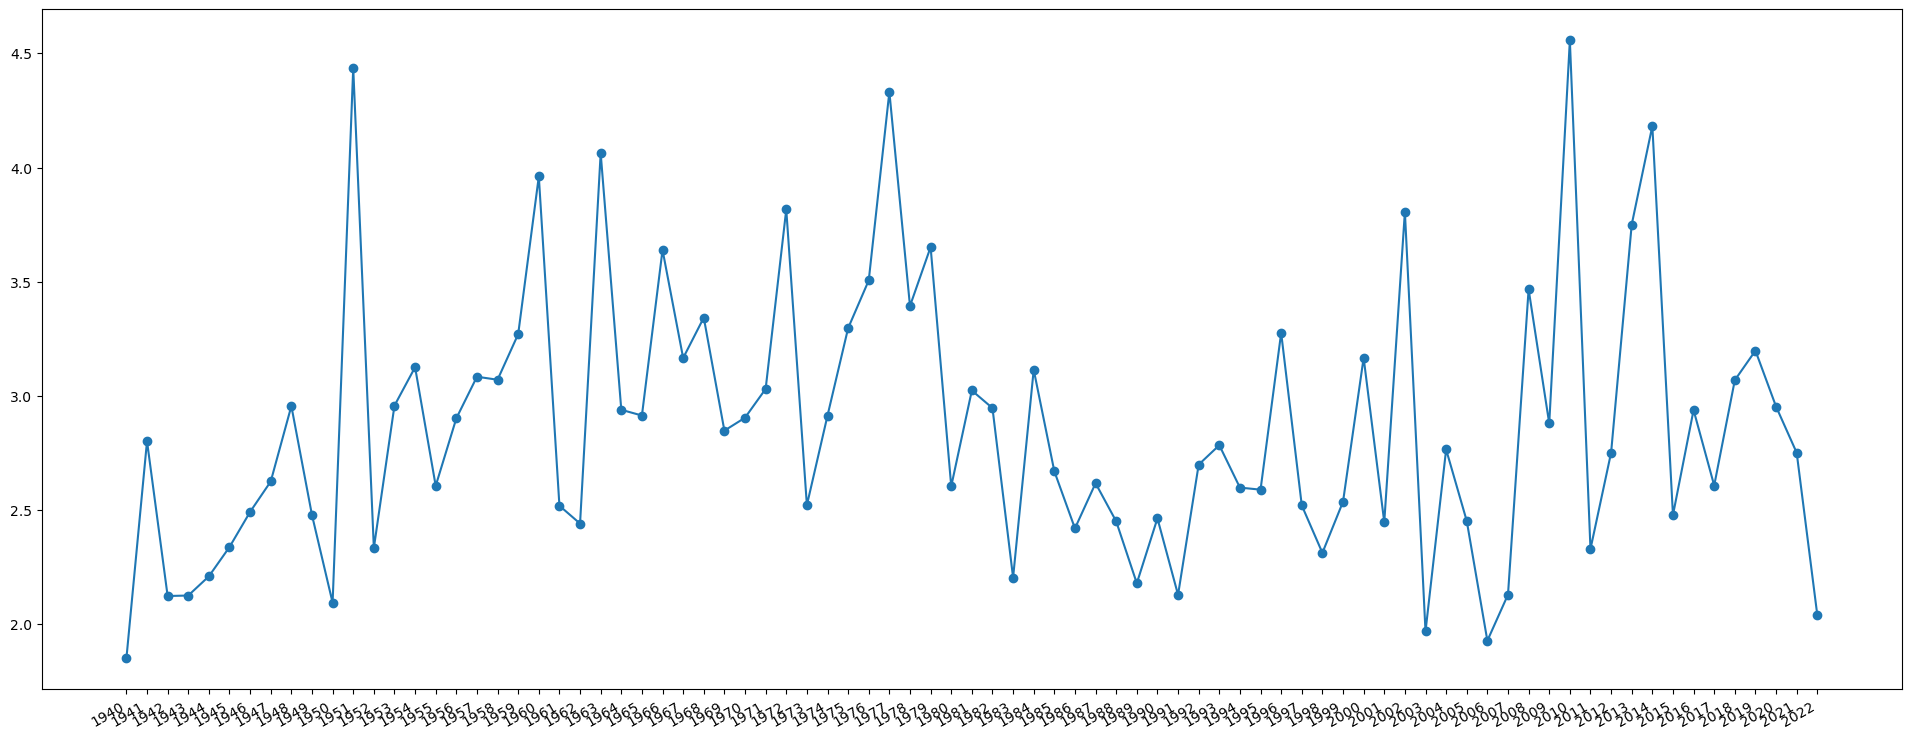

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(24,10)
ax.plot(analysis_precipitation.years.astype(str), analysis_precipitation["mean"], marker='o')
fig.autofmt_xdate()

plt.show()

### Media per 4 anni alla volta

In [28]:
means = []
years_by4 = np.arange(int(weather["time"].dt.strftime('%Y').min()), int(weather["time"].dt.strftime('%Y').max())+1, 4)
for year in years_by4 : 
    mean = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["precipitation"].mean()
    means.append(mean)
mean_per_year = pd.DataFrame({"years" : years_by4, "mean_per_year (mm)" : means})
mean_per_year

,years,mean_per_year (mm)
0,1940,1.850273
1,1944,2.210109
2,1948,2.955738
3,1952,2.334153
4,1956,2.901913
5,1960,3.961202
6,1964,2.939344
7,1968,3.342896
8,1972,3.816667
9,1976,3.506011


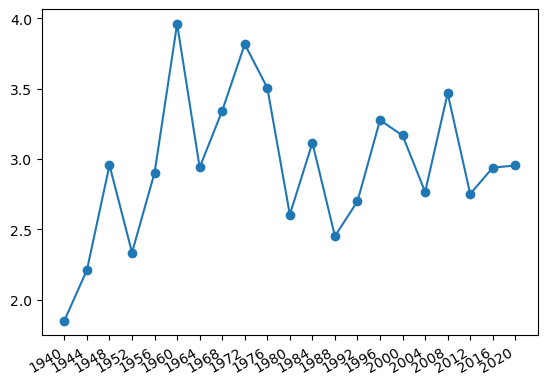

In [29]:
fig, ax = plt.subplots()
ax.plot(mean_per_year.years.astype(str), mean_per_year["mean_per_year (mm)"], marker='o')
fig.autofmt_xdate()
plt.show()

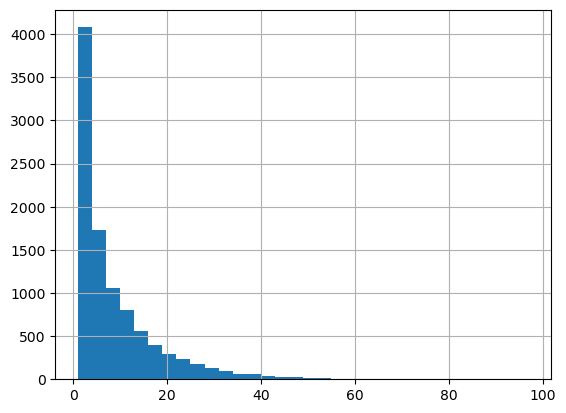

In [62]:
weather[weather["precipitation"]>=1]["precipitation"].hist(
    bins=np.arange(1,100, 3))
plt.show()

### Analisi precipitazioni

In [116]:
forte = []
rovesci = []
nubifragi = []
nubifragi_max = []
for year in years : 
    dfyear = weather[(weather["time"].dt.strftime('%Y'))==str(year)]["precipitation"]
    count_forte  = len(dfyear[(weather["precipitation"]>=6) & (weather["precipitation"]<10)])
    forte.append(count_forte)
    count_rovesci  = len(dfyear[(weather["precipitation"]>=10) & (weather["precipitation"]<30)])
    rovesci.append(count_rovesci)
    count_nubifragi  = len(dfyear[weather["precipitation"]>=30])
    nubifragi.append(count_nubifragi)
    nubifragi_max.append(dfyear.max())
analysis_precipitation = pd.DataFrame({"years" : years, "Pioggia forte (6-10 mm)" : forte, "Rovesci (10-30 mm)" : rovesci , "Nubifragi (+30mm)" : nubifragi, "Massimo nubifragio": nubifragi_max})
analysis_precipitation.drop(analysis_precipitation.tail(1).index,inplace=True) 
analysis_precipitation

,years,Pioggia forte (6-10 mm),Rovesci (10-30 mm),Nubifragi (+30mm),Massimo nubifragio
0,1940,19,16,2,38.2
1,1941,12,38,2,37.9
2,1942,16,23,2,63.7
3,1943,26,19,1,41.5
4,1944,15,20,3,59.2
...,...,...,...,...,...
77,2017,13,28,5,63.1
78,2018,24,28,5,53.5
79,2019,22,35,6,47.6
80,2020,12,25,10,51.8


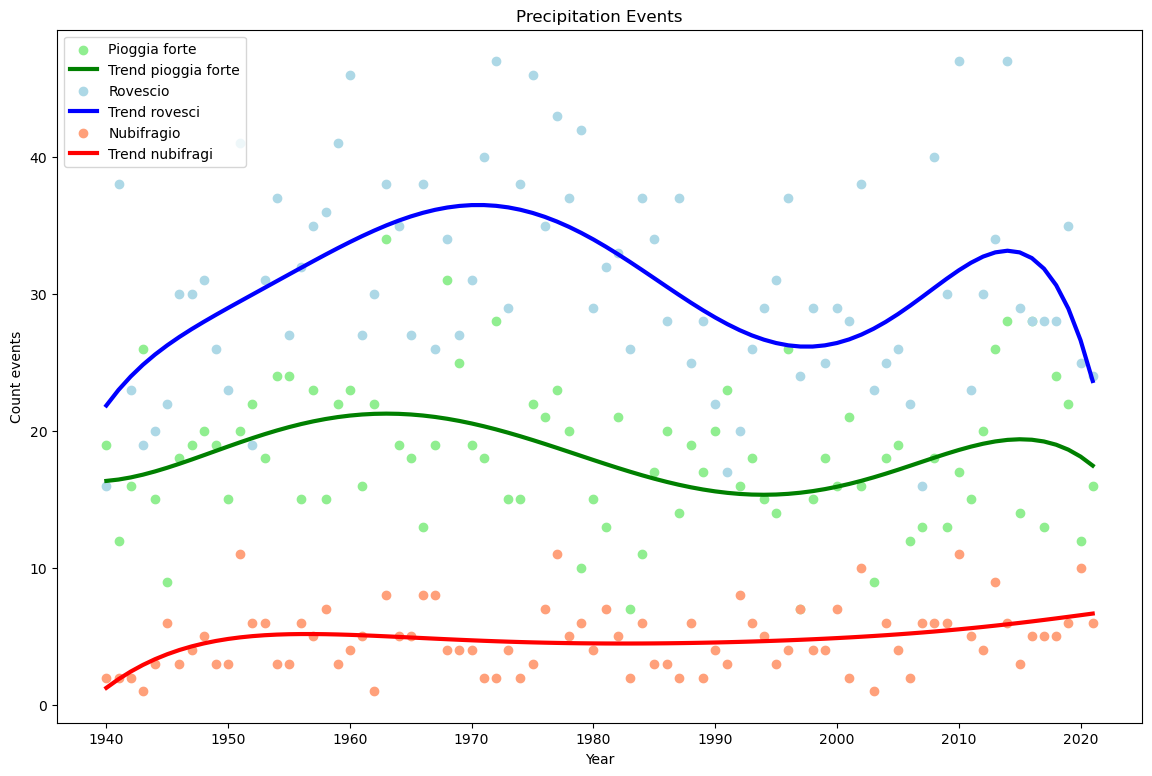

In [123]:
fig = plt.figure()
fig.set_size_inches(14,9)

plt.scatter(analysis_precipitation.years, analysis_precipitation["Pioggia forte (6-10 mm)"], color="lightgreen", label="Pioggia forte")
z = np.polyfit(analysis_precipitation.years, analysis_precipitation["Pioggia forte (6-10 mm)"], 6)
p = np.poly1d(z)
plt.plot(analysis_precipitation.years, p(analysis_precipitation.years), color="green", linewidth=3.0, label="Trend pioggia forte")

plt.scatter(analysis_precipitation.years, analysis_precipitation["Rovesci (10-30 mm)"], color="lightblue", label="Rovescio")
z = np.polyfit(analysis_precipitation.years, analysis_precipitation["Rovesci (10-30 mm)"], 6)
p = np.poly1d(z)
plt.plot(analysis_precipitation.years, p(analysis_precipitation.years), color="blue", linewidth=3.0, label="Trend rovesci")

plt.scatter(analysis_precipitation.years, analysis_precipitation["Nubifragi (+30mm)"], color="lightsalmon", label="Nubifragio")
z = np.polyfit(analysis_precipitation.years, analysis_precipitation["Nubifragi (+30mm)"], 6)
p = np.poly1d(z)
plt.plot(analysis_precipitation.years, p(analysis_precipitation.years), color="red", linewidth=3.0, label="Trend nubifragi")

plt.xlabel("Year")
plt.ylabel("Count events")
plt.title("Precipitation Events")
plt.legend(loc="upper left")

plt.show()

In [114]:
print("Correlazione pioggia forte-anno", analysis_precipitation.years.corr(analysis_precipitation["Pioggia forte (6-10 mm)"]))
print("Correlazione rovesci-anno", analysis_precipitation.years.corr(analysis_precipitation["Rovesci (10-30 mm)"]))
print("Correlazione nubifragi-anno", analysis_precipitation.years.corr(analysis_precipitation["Nubifragi (+30mm)"]))

Correlazione pioggia forte-anno -0.11124663700605976
Correlazione rovesci-anno -0.023421967194964706
Correlazione nubifragi-anno 0.2391515522272857


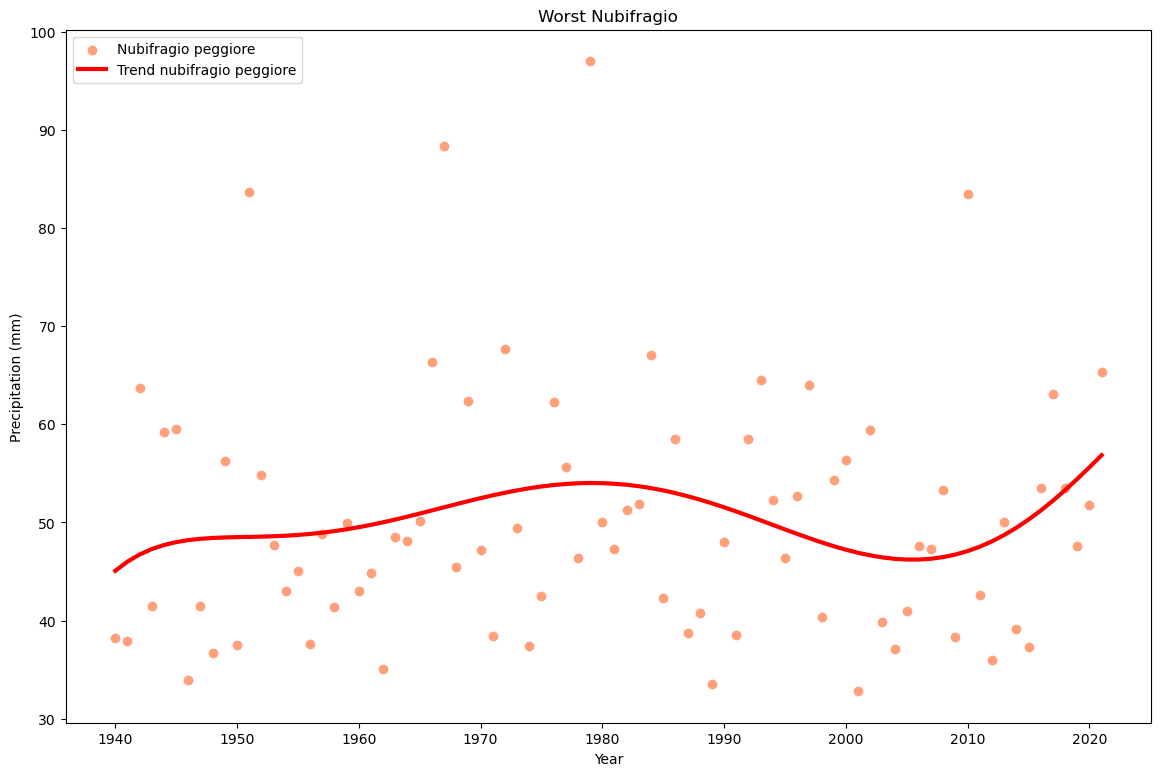

In [124]:
fig = plt.figure()
fig.set_size_inches(14,9)

plt.scatter(analysis_precipitation.years, analysis_precipitation["Massimo nubifragio"], color="lightsalmon", label="Nubifragio peggiore")
z = np.polyfit(analysis_precipitation.years, analysis_precipitation["Massimo nubifragio"], 6)
p = np.poly1d(z)
plt.plot(analysis_precipitation.years, p(analysis_precipitation.years), color="red", linewidth=3.0, label="Trend nubifragio peggiore")

plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.title("Worst Nubifragio")
plt.legend(loc="upper left")

plt.show()

In [67]:
primavera_sum = []
estate_sum = []
autunno_sum = []
inverno_sum = []
sum_label = []
for year in years : 
    a_primavera_sum = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Primavera")]["precipitation"].sum()
    primavera_sum.append(a_primavera_sum)
    a_estate_sum = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Estate")]["precipitation"].sum()
    estate_sum.append(a_estate_sum)
    a_autunno_sum = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Autunno")]["precipitation"].sum()
    autunno_sum.append(a_autunno_sum)
    a_inverno_sum = weather[((weather["time"].dt.strftime('%Y'))==str(year)) & (weather["season"]=="Inverno")]["precipitation"].sum()
    inverno_sum.append(a_inverno_sum)

    sum_label.append(str(year))
analysis_precipitation = pd.DataFrame({"years" : years, "primavera" : primavera_sum, "estate" : estate_sum, "autunno" : autunno_sum, "inverno" : inverno_sum})
analysis_precipitation

,years,primavera,estate,autunno,inverno
0,1940,216.6,194.1,238.3,28.2
1,1941,395.6,227.0,189.6,210.5
2,1942,209.6,250.4,182.3,132.9
3,1943,135.7,257.0,224.9,158.4
4,1944,156.2,162.8,405.5,84.4
...,...,...,...,...,...
78,2018,401.5,307.1,334.9,76.7
79,2019,280.7,242.3,503.1,141.3
80,2020,221.5,388.9,260.4,210.2
81,2021,171.8,342.4,302.9,187.1


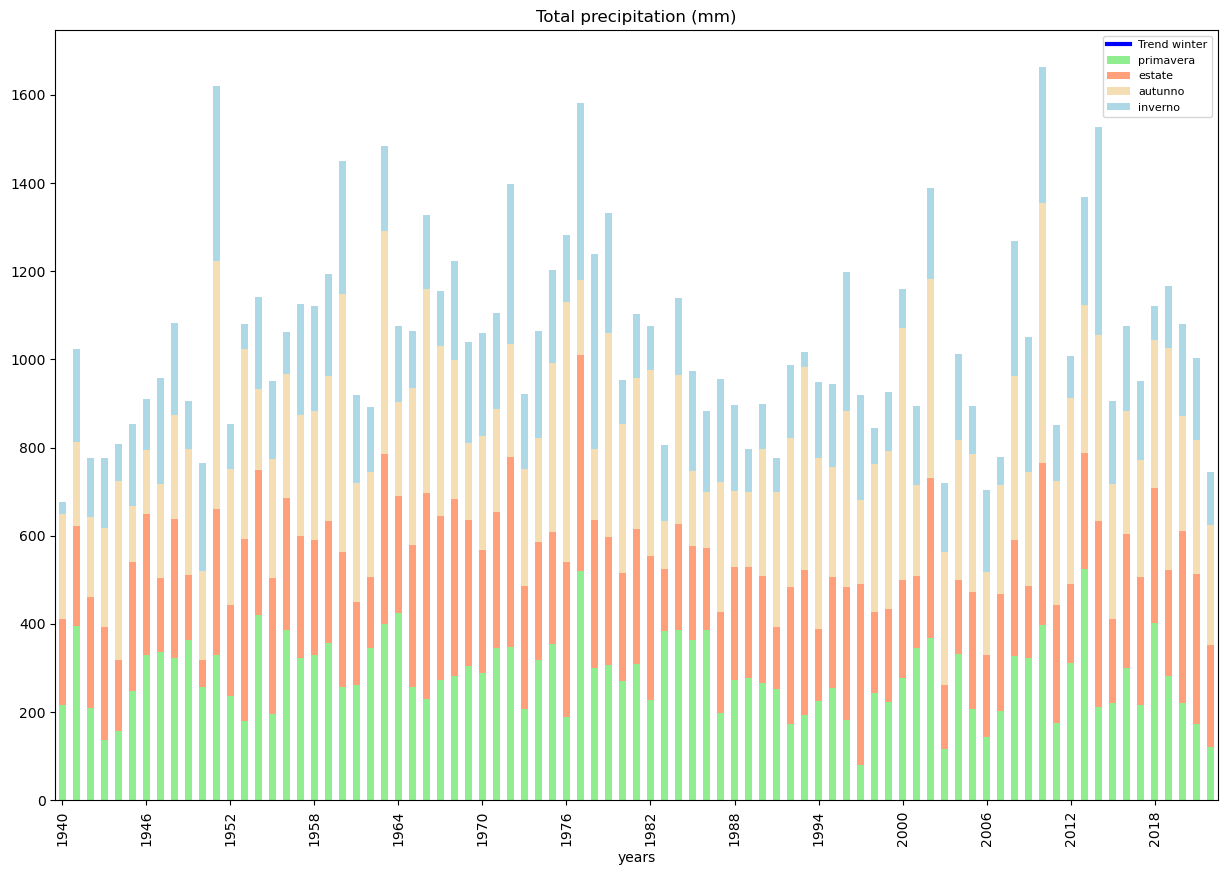

In [68]:
ax = analysis_precipitation.plot(x='years', kind='bar', stacked=True, title='Total precipitation (mm)', color=["lightgreen", "lightsalmon", "wheat", "lightblue"], figsize=(15,10))

z = np.polyfit(analysis_precipitation.years, analysis_precipitation.inverno, 6)
p = np.poly1d(z)
plt.plot(analysis_precipitation.years, p(analysis_precipitation.years), color="blue", linewidth=3.0, label="Trend winter")

plt.locator_params(nbins=15)
plt.legend(prop={'size': 8})

plt.show()

In [69]:
print("Correlazioni anno-totale precipitazioni annuali: ", analysis_precipitation.years.corr(analysis_precipitation.primavera+analysis_precipitation.estate+analysis_precipitation.autunno+analysis_precipitation.inverno))
print("Correlazioni anno-totale precipitazioni in primavera: ", analysis_precipitation.years.corr(analysis_precipitation.primavera))
print("Correlazioni anno-totale precipitazioni in estate: ", analysis_precipitation.years.corr(analysis_precipitation.estate))
print("Correlazioni anno-totale precipitazioni in autunno: ", analysis_precipitation.years.corr(analysis_precipitation.autunno))
print("Correlazioni anno-totale precipitazioni in inverno: ", analysis_precipitation.years.corr(analysis_precipitation.inverno))

Correlazioni anno-totale precipitazioni annuali:  0.03803741912750036
Correlazioni anno-totale precipitazioni in primavera:  -0.14731588546376564
Correlazioni anno-totale precipitazioni in estate:  -0.015471285620430975
Correlazioni anno-totale precipitazioni in autunno:  0.18101755731957545
Correlazioni anno-totale precipitazioni in inverno:  0.021049019149370612


0.8299960146788794


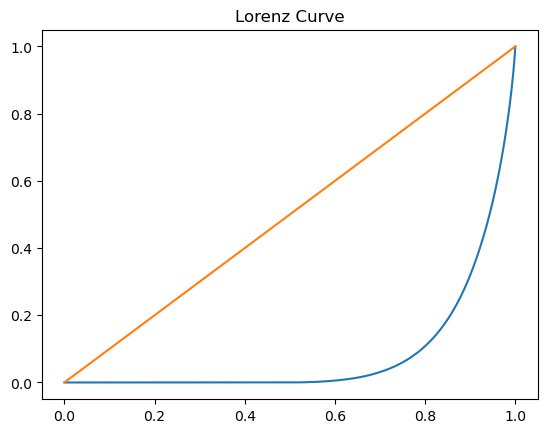

In [128]:
precipitation = np.array(weather["precipitation"])
precipitation.sort()

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(precipitation))

lorenz_curve = lorenz(precipitation)

# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])

plt.title("Lorenz Curve")

plt.show()

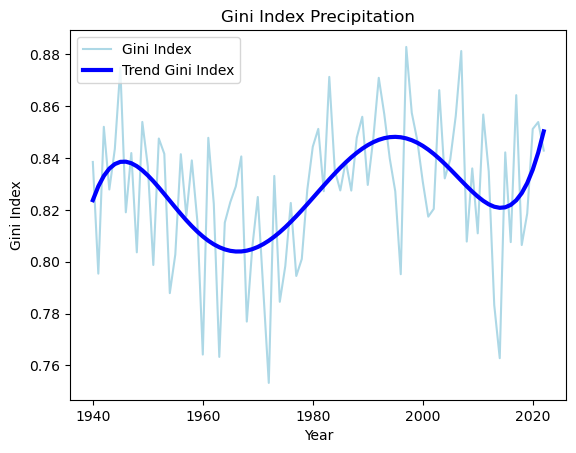

0.15267391314548306

In [135]:
all_precipitation = []
for year in years :
    precipitation = np.array(weather[(weather["time"].dt.strftime('%Y'))==str(year)]["precipitation"])
    precipitation.sort()
    gini_index = gini(precipitation)
    #print(gini_index)
    all_precipitation.append(gini_index)

plt.plot(years, all_precipitation, label="Gini Index", color="lightblue")

z = np.polyfit(years, all_precipitation, 5)
p = np.poly1d(z)
plt.plot(years, p(years), color="blue", linewidth=3.0, label="Trend Gini Index")

plt.title("Gini Index Precipitation")
plt.xlabel("Year")
plt.ylabel("Gini Index")
plt.legend(loc="upper left")

plt.show()
all_precipitation = pd.DataFrame(all_precipitation)
analysis_precipitation.years.corr(all_precipitation[0])

#### Prove

<AxesSubplot:>

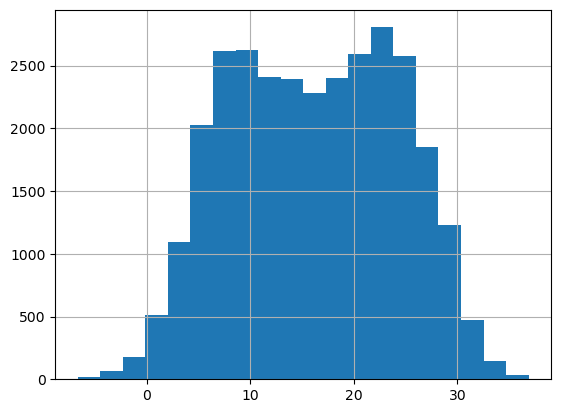

In [36]:
weather["max_temp"].hist(bins=20)

,time,max_temp,min_temp,mean_temp,precipitation,season
31,1940-02-01,-0.7,-7.6,-3.7,7.9,Inverno
32,1940-02-02,2.2,-6.4,-2.3,0.0,Inverno
33,1940-02-03,0.8,-5.5,-2.2,0.0,Inverno
34,1940-02-04,3.3,-4.2,-0.2,0.0,Inverno
35,1940-02-05,5.2,-3.8,0.4,0.0,Inverno
...,...,...,...,...,...,...
30005,2022-02-24,12.4,0.4,6.5,0.0,Inverno
30006,2022-02-25,13.3,-0.7,5.9,0.0,Inverno
30007,2022-02-26,11.7,-3.1,4.6,0.1,Inverno
30008,2022-02-27,9.5,-3.4,3.4,0.1,Inverno


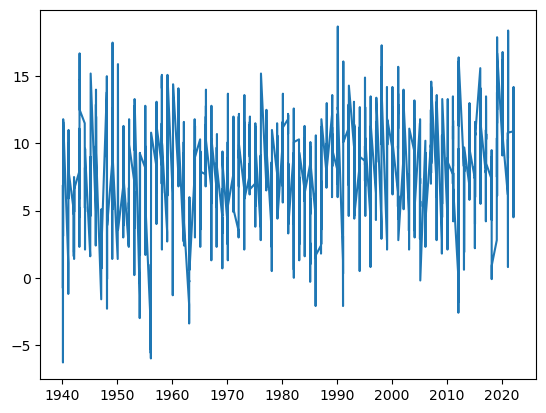

In [37]:
w = weather[(weather["time"].dt.strftime('%m'))==months[1]]

plt.plot(w.time, w["max_temp"])
w